Mehak Malik

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [2]:
df_orders = pd.read_csv('csv/orders_and_shipments.csv',encoding='ISO-8859-1')
df_inventory = pd.read_csv('csv/inventory.csv')
df_fulfillment = pd.read_csv('csv/fulfillment.csv')

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30871 entries, 0 to 30870
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0    Order ID                    30871 non-null  int64 
 1    Order Item ID               30871 non-null  int64 
 2    Order YearMonth             30871 non-null  int64 
 3    Order Year                  30871 non-null  int64 
 4    Order Month                 30871 non-null  int64 
 5    Order Day                   30871 non-null  int64 
 6   Order Time                   30871 non-null  object
 7   Order Quantity               30871 non-null  int64 
 8   Product Department           30871 non-null  object
 9   Product Category             30871 non-null  object
 10  Product Name                 30871 non-null  object
 11   Customer ID                 30871 non-null  int64 
 12  Customer Market              30871 non-null  object
 13  Customer Region              30

In [4]:
df_inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             4200 non-null   object 
 1    Year Month              4200 non-null   int64  
 2    Warehouse Inventory     4200 non-null   int64  
 3   Inventory Cost Per Unit  4200 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 131.4+ KB


In [5]:
df_fulfillment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product Name                          118 non-null    object 
 1    Warehouse Order Fulfillment (days)   118 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [6]:

import pandas as pd
merged_df = pd.merge(df_orders, df_inventory, on='Product Name', how='inner')
merged_df = pd.merge(merged_df, df_fulfillment, on='Product Name', how='inner')


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110063 entries, 0 to 1110062
Data columns (total 28 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0    Order ID                             1110063 non-null  int64  
 1    Order Item ID                        1110063 non-null  int64  
 2    Order YearMonth                      1110063 non-null  int64  
 3    Order Year                           1110063 non-null  int64  
 4    Order Month                          1110063 non-null  int64  
 5    Order Day                            1110063 non-null  int64  
 6   Order Time                            1110063 non-null  object 
 7   Order Quantity                        1110063 non-null  int64  
 8   Product Department                    1110063 non-null  object 
 9   Product Category                      1110063 non-null  object 
 10  Product Name                          1110063 non-null

In [8]:

df = merged_df


In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


In [10]:
if df.duplicated().any():
    print(f"There are as many as {supply_data.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


In [11]:
df.columns = df.columns.str.strip()

In [12]:
df['Discount %'].sample(30)

228693      0.15
287609      0.15
492659      0.15
919978      0.06
672973      0.09
906805      0.05
991450      0.18
560623      0.06
968952      0.04
1066410     0.13
369389      0.12
757462      0.01
65092       0.15
194391      0.17
637387      0.02
511611      0.18
316127      0.09
183210       0.1
30925       0.13
414809      0.13
249766      0.16
901481      0.01
101337      0.17
765         0.15
1091234     0.03
1074653      -  
617702      0.04
795380      0.15
11088       0.06
171807      0.17
Name: Discount %, dtype: object

In [13]:
# Convert the '-' values to 0 in the 'Discount %' column and then change the data type from object to float
df['Discount %'] = df['Discount %'].replace('  -  ', 0).astype(float)

In [14]:
# Make new columns: Order Datetime and Shipment Datetime
df['Order Datetime'] = pd.to_datetime(df['Order Year'].astype(str) + '-' + df['Order Month'].astype(str) + '-' + df['Order Day'].astype(str) + ' ' + df['Order Time'])
df['Shipment Datetime'] = pd.to_datetime(df['Shipment Year'].astype(str) + '-' + df['Shipment Month'].astype(str) + '-' + df['Shipment Day'].astype(str))

# Displaying the result
df[['Order Datetime', 'Shipment Datetime']].head()

Order Datetime Shipment Datetime
0 2015-02-21 14:07:00        2015-02-27
1 2015-02-21 14:07:00        2015-02-27
2 2015-02-21 14:07:00        2015-02-27
3 2015-02-21 14:07:00        2015-02-27
4 2015-02-21 14:07:00        2015-02-27

In [15]:
df.drop(columns=['Order Year', 'Order Month', 'Order Day', 'Order Time',
                        'Shipment Year', 'Shipment Month', 'Shipment Day'], inplace=True)

In [16]:
df['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican\xa0Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d\x92Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'Nigeria', 'Vietnam', 'Bolivia', 'El Salvador', 'Colombia',
       'Belgium', 'Portugal', 'New zealand', 'Egypt', 'Gabon', 'Ireland',
       'Ghana', 'Thailand', 'Russia', 'Malaysia', 'Austria', 'Belarus',
       'Mali', 'Switzerland', 'Kenya', 'Saudi Arabia', 'Jordania',
       'Ukraine', 'Norway', 'Algeria\xa0', 'Lithuania', 'Barbados',
       'Guyana', 'Myanm

In [17]:
df['Customer Country'] = df['Customer Country'].replace({
    'Dominican\xa0Republic': 'Dominican Republic',
    'Cote d\x92Ivoire': 'Cote d Ivoire', # Added a comma at the end of this line
    'Perú': 'Peru',
    'Algeria\xa0': 'Algeria',
    'Israel\xa0':'Israel',
    'Benín': 'Benin'
})
df['Customer Country'].unique()

array(['Mexico', 'Brazil', 'Denmark', 'Netherlands', 'Germany', 'China',
       'Indonesia', 'Pakistan', 'India', 'USA', 'Hungary', 'Sudan',
       'Democratic Republic of Congo', 'Poland', 'Togo', 'Guatemala',
       'Panama', 'Chile', 'France', 'Sweden', 'Dominican Republic',
       'Venezuela', 'South Korea', 'Madagascar', 'Iran', 'Cuba',
       'Nicaragua', 'United Kingdom', 'Afghanistan', 'Singapore',
       'Morocco', 'Spain', 'Niger', 'Turkey', 'South Africa', 'Iraq',
       'Honduras', 'Italy', 'Australia', 'Cote d Ivoire', 'Croatia',
       'Ecuador', 'Syria', 'Haiti', 'Bangladesh', 'Argentina', 'Romania',
       'Nigeria', 'Vietnam', 'Bolivia', 'El Salvador', 'Colombia',
       'Belgium', 'Portugal', 'New zealand', 'Egypt', 'Gabon', 'Ireland',
       'Ghana', 'Thailand', 'Russia', 'Malaysia', 'Austria', 'Belarus',
       'Mali', 'Switzerland', 'Kenya', 'Saudi Arabia', 'Jordania',
       'Ukraine', 'Norway', 'Algeria', 'Lithuania', 'Barbados', 'Guyana',
       'Myanmar', 'Zamb

In [18]:
df['Order Processing Time'] = (df['Shipment Datetime'] - df['Order Datetime']).dt.days
df['Order Processing Time'] = df['Order Processing Time'].apply(lambda x: 0 if x == -1 else x)

df.sample(5)

Order ID  Order Item ID  Order YearMonth  Order Quantity  \
235030      57533         143937           201704               1   
902402      67668         169184           201709               1   
506777       2566           6417           201502               5   
834375      23205          58095           201505               4   
1006349     61298         153345           201708               1   

        Product Department  Product Category  \
235030            Fan Shop  Camping & Hiking   
902402             Apparel    Men's Footwear   
506777            Footwear  Cardio Equipment   
834375             Apparel            Cleats   
1006349            Apparel    Men's Footwear   

                                          Product Name  Customer ID  \
235030   Diamondback Women's Serene Classic Comfort Bi        12017   
902402         Nike Men's CJ Elite 2 TD Football Cleat         8375   
506777               Nike Men's Free 5.0+ Running Shoe        10398   
834375                Perfect Fitness Perfect Rip Deck        11167   
1006349        Nike Men's CJ Elite 2 TD Football Cleat         4061   

        Customer Market  Customer Region  ... Gross Sales Discount % Profit  \
235030            LATAM  Central America  ...         300       0.09    150   
902402           Europe  Southern Europe  ...         130       0.06     65   
506777            LATAM    South America  ...         500       0.12    245   
834375     Pacific Asia          Oceania  ...         240       0.20    147   
1006349           LATAM    South America  ...         130       0.15     65   

         Year Month  Warehouse Inventory  Inventory Cost Per Unit  \
235030       201602                   90                  1.95824   
902402       201610                  182                  0.77670   
506777       201606                  307                  0.89084   
834375       201608                  931                  1.86713   
1006349      201507                  216                  0.85246   

         Warehouse Order Fulfillment (days)      Order Datetime  \
235030                                  6.9 2017-04-19 20:01:00   
902402                                  7.0 2017-09-14 18:45:00   
506777                                  9.4 2015-02-07 10:38:00   
834375                                  8.3 2015-05-06 21:01:00   
1006349                                 7.0 2017-08-08 00:04:00   

         Shipment Datetime  Order Processing Time  
235030          2017-04-21                      1  
902402          2017-09-25                     10  
506777          2017-01-02                    694  
834375          2015-05-11                      4  
1006349         2017-08-14                      5  

[5 rows x 24 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110063 entries, 0 to 1110062
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   Order ID                            1110063 non-null  int64         
 1   Order Item ID                       1110063 non-null  int64         
 2   Order YearMonth                     1110063 non-null  int64         
 3   Order Quantity                      1110063 non-null  int64         
 4   Product Department                  1110063 non-null  object        
 5   Product Category                    1110063 non-null  object        
 6   Product Name                        1110063 non-null  object        
 7   Customer ID                         1110063 non-null  int64         
 8   Customer Market                     1110063 non-null  object        
 9   Customer Region                     1110063 non-null  object        

In [20]:
#Total Cost of Inventory is a significant financial metric in supply chain management that calculates the overall cost associated with holding and managing inventory.
df['Storage_Cost'] = df['Inventory Cost Per Unit']*df['Warehouse Inventory']

In [21]:
#Profit Margin helps to assessing the profitability of the supply chain operations. It provides insights into the effectiveness of cost control and pricing strategies, enabling organizations to make adjustments to enhance overall profitability.
df['Profit_Margin'] = (df['Profit'] / df['Gross Sales']*100)

In [11]:


# Calculate the top 5 profitable product groups
top_5_product_groups = df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(5)

# Extract product names and profit margins
product_names = top_5_product_groups.index.to_list()
profit_margins = top_5_product_groups.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(profit_margins, labels=product_names, autopct="%1.1f%%")
plt.title("Top 5 Profitable Product Groups")
plt.show()


NameError: name 'df' is not defined

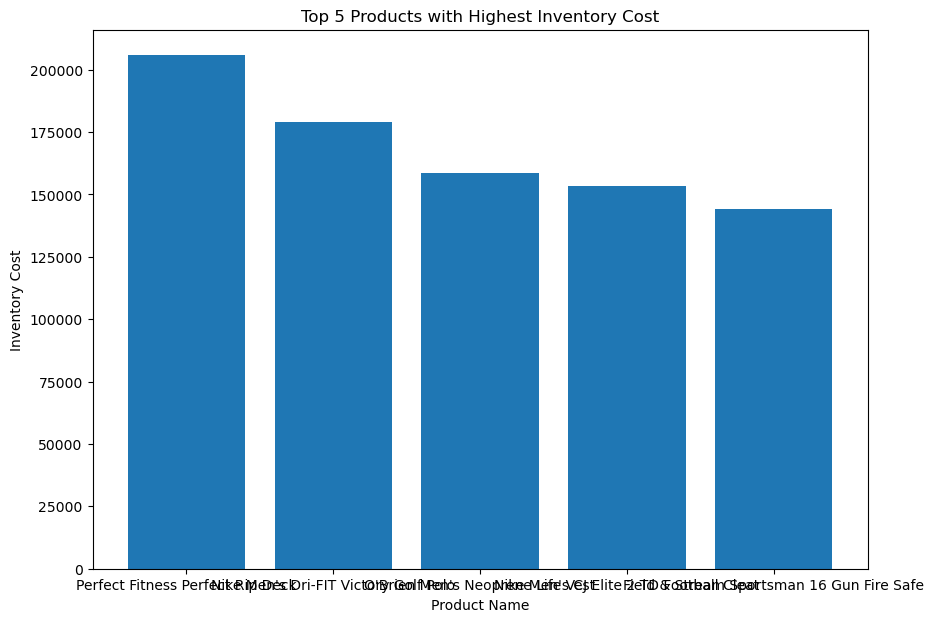

In [23]:

import matplotlib.pyplot as plt
# Calculate the top 5 products with highest inventory cost
top_5_products_inventory_cost = df.groupby('Product Name')['Inventory Cost Per Unit'].sum().sort_values(ascending=False).head(5)

# Extract product names and inventory cost
product_names = top_5_products_inventory_cost.index.to_list()
inventory_cost = top_5_products_inventory_cost.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(product_names, inventory_cost)
plt.title("Top 5 Products with Highest Inventory Cost")
plt.xlabel("Product Name")
plt.ylabel("Inventory Cost")
plt.show()


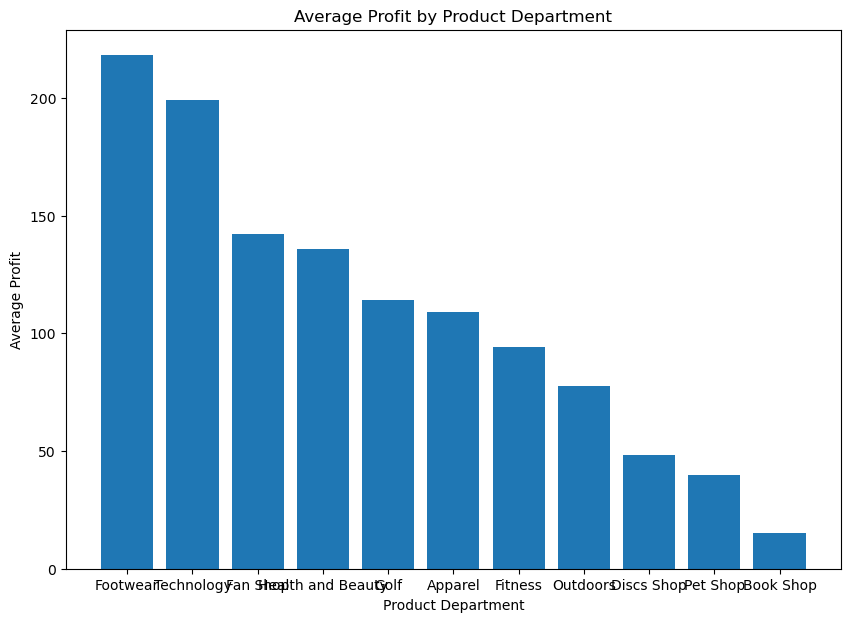

In [24]:

import matplotlib.pyplot as plt
# Calculate average profit per product department
avg_profit_by_department = df.groupby('Product Department')['Profit'].mean().sort_values(ascending=False)

# Extract product department names and average profit
department_names = avg_profit_by_department.index.to_list()
avg_profit = avg_profit_by_department.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(department_names, avg_profit)
plt.title("Average Profit by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Average Profit")
plt.show()


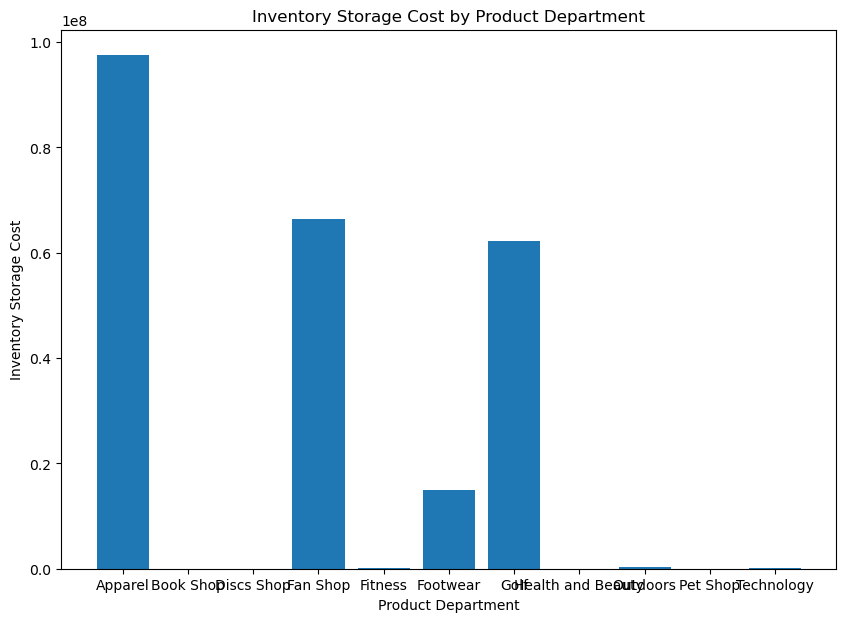

In [25]:

import matplotlib.pyplot as plt
# Calculate the inventory storage cost per product department
storage_cost_by_department = df.groupby('Product Department')['Storage_Cost'].sum()

# Extract product department names and storage cost
department_names = storage_cost_by_department.index.to_list()
storage_cost = storage_cost_by_department.values.tolist()

# Create a bar chart
plt.figure(figsize=(10, 7))
plt.bar(department_names, storage_cost)
plt.title("Inventory Storage Cost by Product Department")
plt.xlabel("Product Department")
plt.ylabel("Inventory Storage Cost")
plt.show()


        Warehouse Order Fulfillment (days) 
count                            118.000000
mean                               5.333898
std                                2.414282
min                                1.000000
25%                                3.300000
50%                                5.300000
75%                                6.975000
max                                9.900000


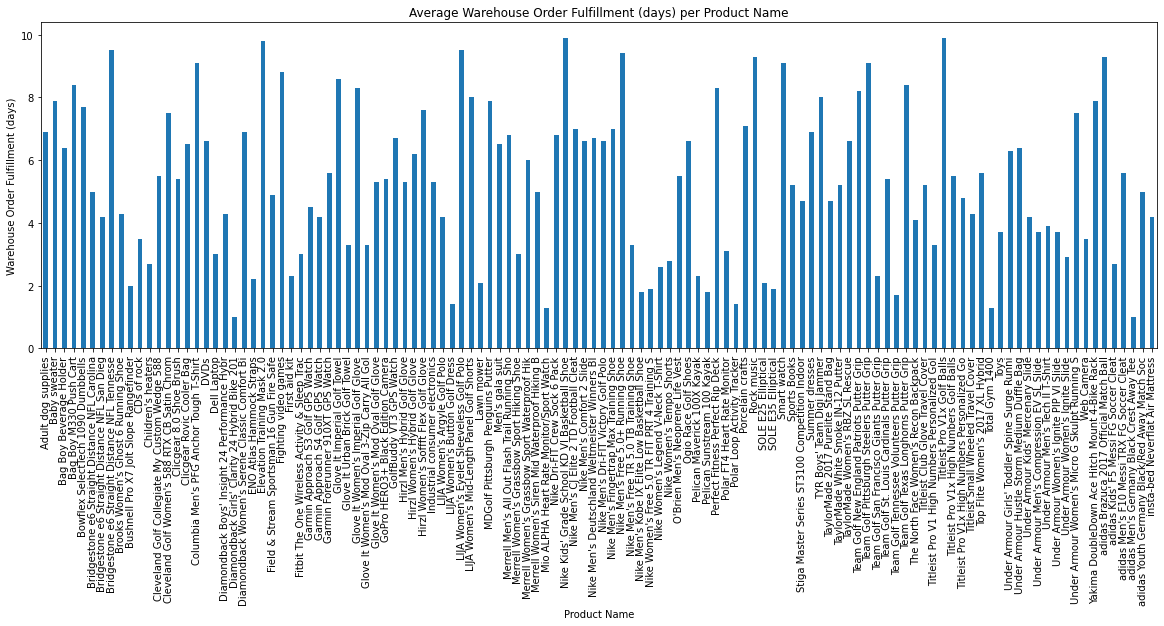

In [23]:
#df_fulfillment analysis and visualization
# Analysis
print(df_fulfillment.describe())

# Visualization
# the Warehouse Order Fulfillment (days) per Product Name
fulfillment_per_product = df_fulfillment.groupby('Product Name')[' Warehouse Order Fulfillment (days) '].mean()

plt.figure(figsize=(20,6))
fulfillment_per_product.plot(kind='bar')
plt.title('Average Warehouse Order Fulfillment (days) per Product Name')
plt.xlabel('Product Name')
plt.ylabel('Warehouse Order Fulfillment (days)')
plt.show()

In [26]:
# Calculate the supply chain risk assessment score
df['Supply Chain Risk Assessment'] = (df['Order Processing Time'] + df['Storage_Cost'] + df['Inventory Cost Per Unit']) / df['Profit_Margin']

# Display the supply chain risk assessment score for each product
df['Supply Chain Risk Assessment'].head()


0    0.127830
1    0.144369
2    0.108093
3    0.369390
4    6.685936
Name: Supply Chain Risk Assessment, dtype: float64

In [ ]:
df.to_csv('SCA.csv')

In [ ]:
df.to_json('SCA.json', orient = 'split', compression = 'infer')

In [ ]:
df.to_excel("SCA.xlsx")

In [27]:

import numpy as np
# Import necessary libraries
from sklearn.cluster import KMeans

# Extract relevant data for clustering
data = df[['Order Processing Time', 'Storage_Cost', 'Inventory Cost Per Unit']]

# Determine the optimal number of clusters using the elbow method
inertia_scores = []
cluster_num = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    inertia_scores.append(kmeans.inertia_)
    cluster_num.append(n)

# Select the optimal number of clusters based on the elbow method
optimal_clusters = cluster_num[np.argmin(inertia_scores)]

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

# Add cluster labels to the DataFrame
df['Customer Segment'] = kmeans.labels_

# Analyze customer segments
df.groupby('Customer Segment').agg({'Order Processing Time': 'mean', 'Storage_Cost': 'mean', 'Inventory Cost Per Unit': 'mean'})


Order Processing Time  Storage_Cost  Inventory Cost Per Unit
Customer Segment                                                              
0                              1.755741   1180.399819                 2.193236
1                              2.847509    147.768049                 1.209536
2                              3.983609    549.155431                 1.408840
3                              1.572926   1814.635635                 2.003120
4                            491.562967    145.666048                 1.146551
5                           -495.419188    142.475131                 1.145064
6                              3.629650    312.039287                 1.418111
7                              2.682289     27.974873                 1.090038
8                              1.989444    813.350438                 1.629056

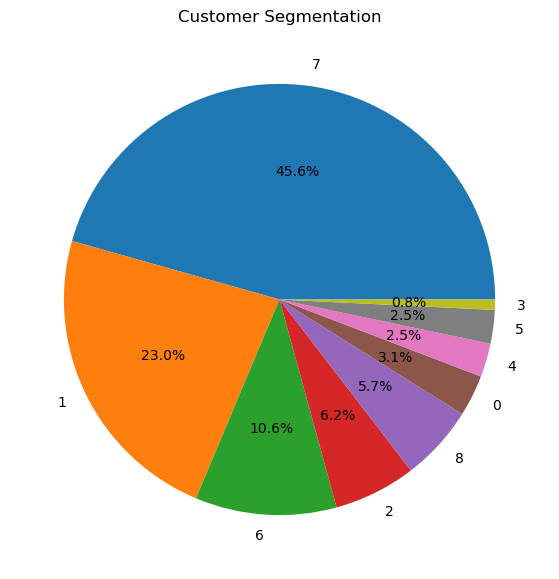

In [28]:
# prompt: plot the customer segment in pie chart

import matplotlib.pyplot as plt
# Calculate the number of customers in each segment
segment_counts = df['Customer Segment'].value_counts()

# Extract segment labels and counts
labels = segment_counts.index.to_list()
counts = segment_counts.values.tolist()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(counts, labels=labels, autopct="%1.1f%%")
plt.title("Customer Segmentation")
plt.show()


# Shubham Patil

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/149833508.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Order YearMonth', y='Gross Sales', data=df, estimator='sum', ci=None)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


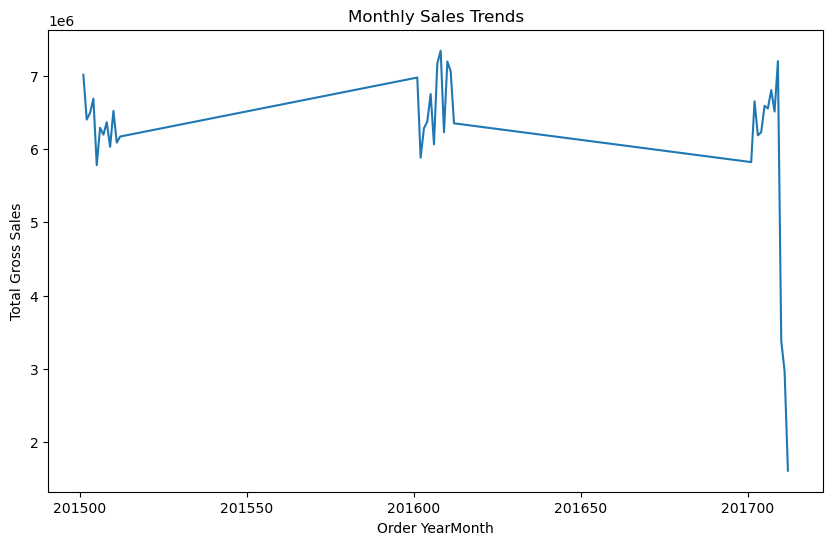

In [30]:
import seaborn as sns
# Monthly Sales Trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order YearMonth', y='Gross Sales', data=df, estimator='sum', ci=None)
plt.title('Monthly Sales Trends')
plt.xlabel('Order YearMonth')
plt.ylabel('Total Gross Sales')
plt.show()

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/855195561.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Department', y='Gross Sales', data=df, estimator=sum, ci=None)


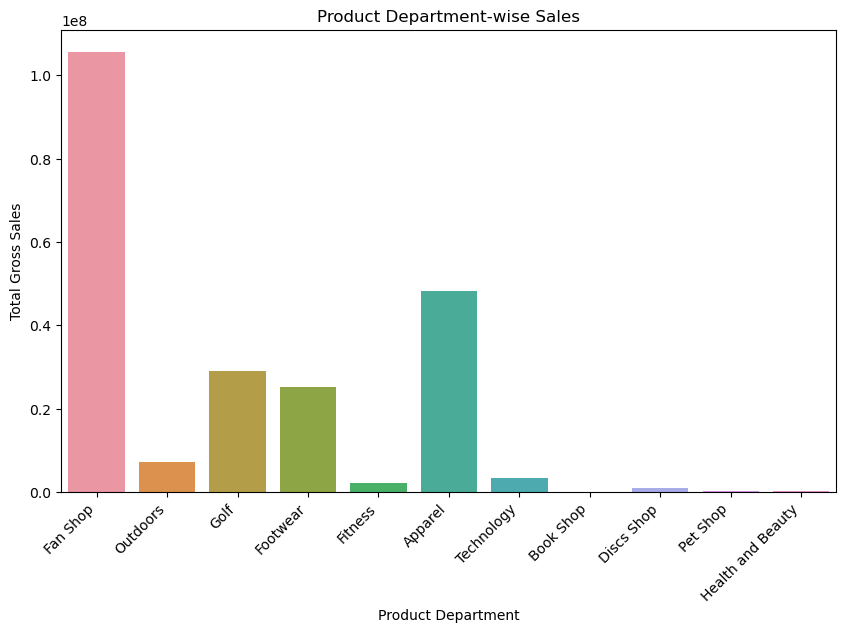

In [32]:
# Product Department-wise Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Department', y='Gross Sales', data=df, estimator=sum, ci=None)
plt.title('Product Department-wise Sales')
plt.xlabel('Product Department')
plt.ylabel('Total Gross Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

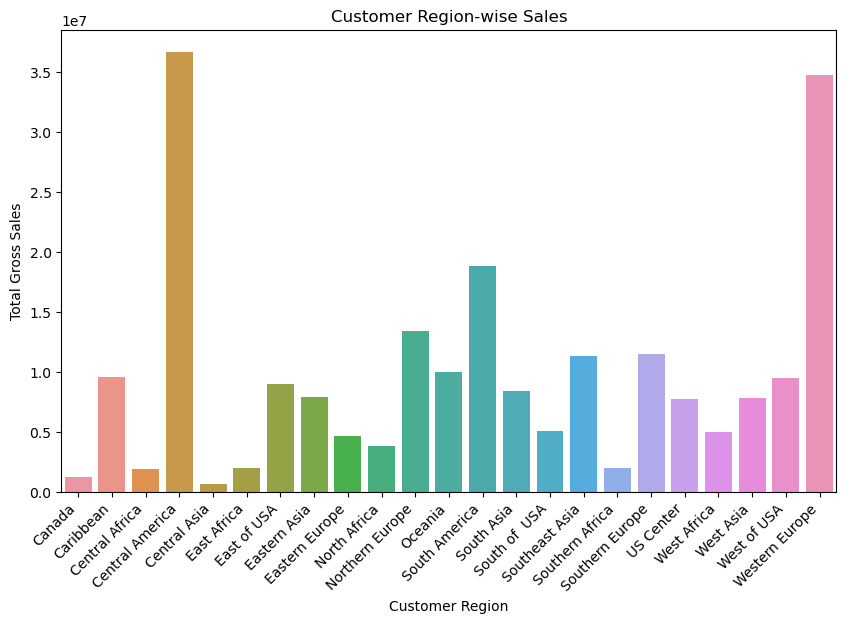

In [34]:
# Customer Region-wise Sales
plt.figure(figsize=(10, 6))
df_region = df.groupby('Customer Region')['Gross Sales'].sum().reset_index()
sns.barplot(x='Customer Region', y='Gross Sales', data=df_region)
plt.title('Customer Region-wise Sales')
plt.xlabel('Customer Region')
plt.ylabel('Total Gross Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

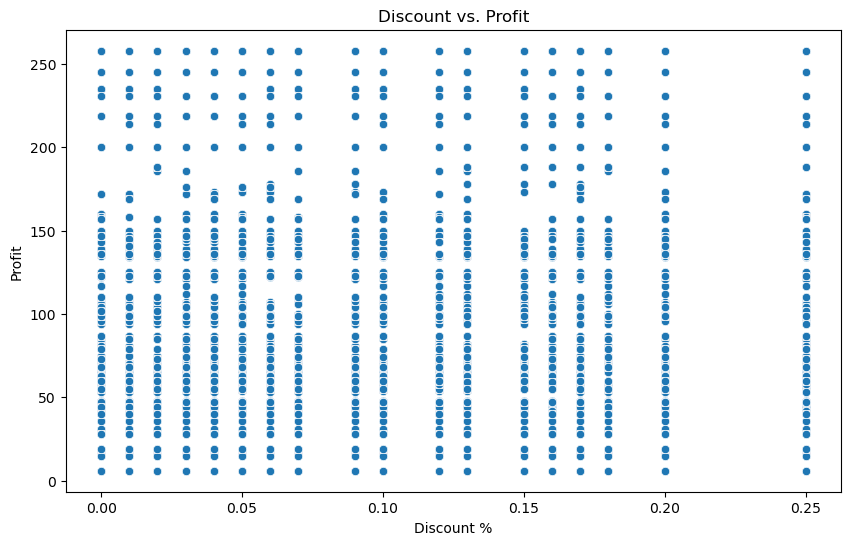

In [35]:
# Discount vs. Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount %', y='Profit', data=df)
plt.title('Discount vs. Profit')
plt.xlabel('Discount %')
plt.ylabel('Profit')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


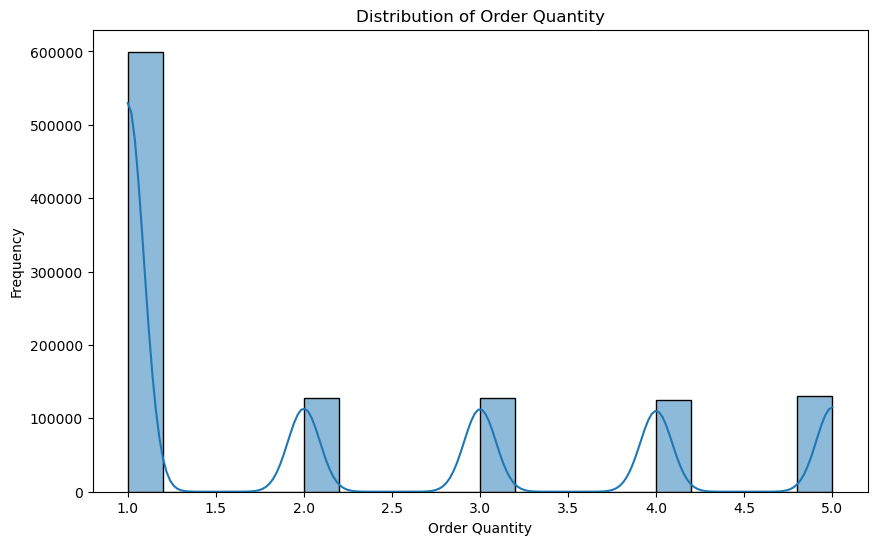

In [36]:
# Distribution of Order Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Quantity'], bins=20, kde=True)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

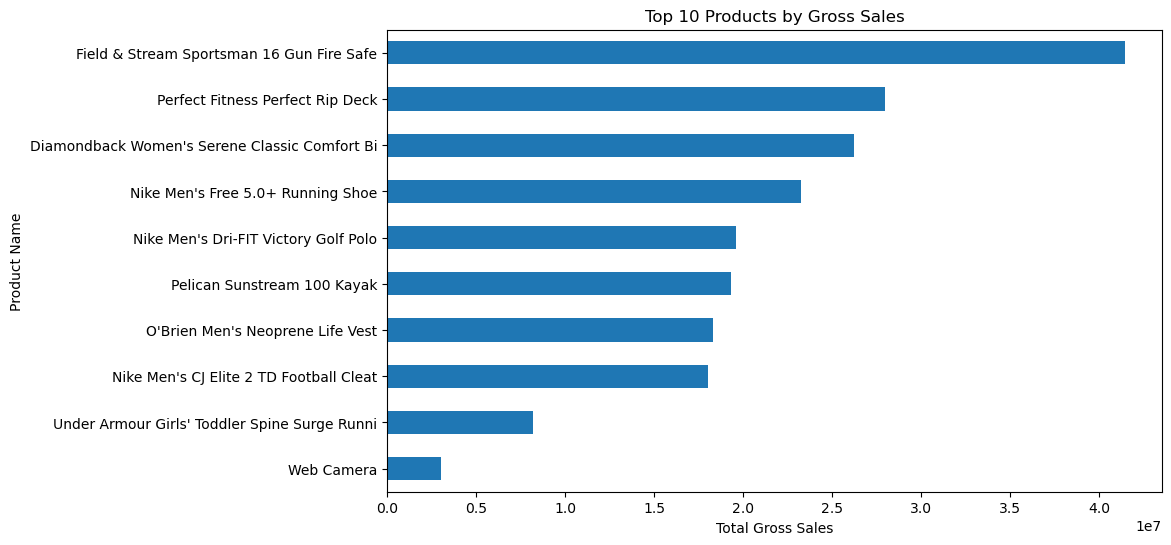

In [37]:
# Top Products by Gross Sales
top_products = df.groupby('Product Name')['Gross Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Gross Sales')
plt.xlabel('Total Gross Sales')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Invert y-axis to show top products at the top
plt.show()

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/1500118382.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Market', y='Gross Sales', hue='Product Department', data=df, estimator=sum, ci=None)


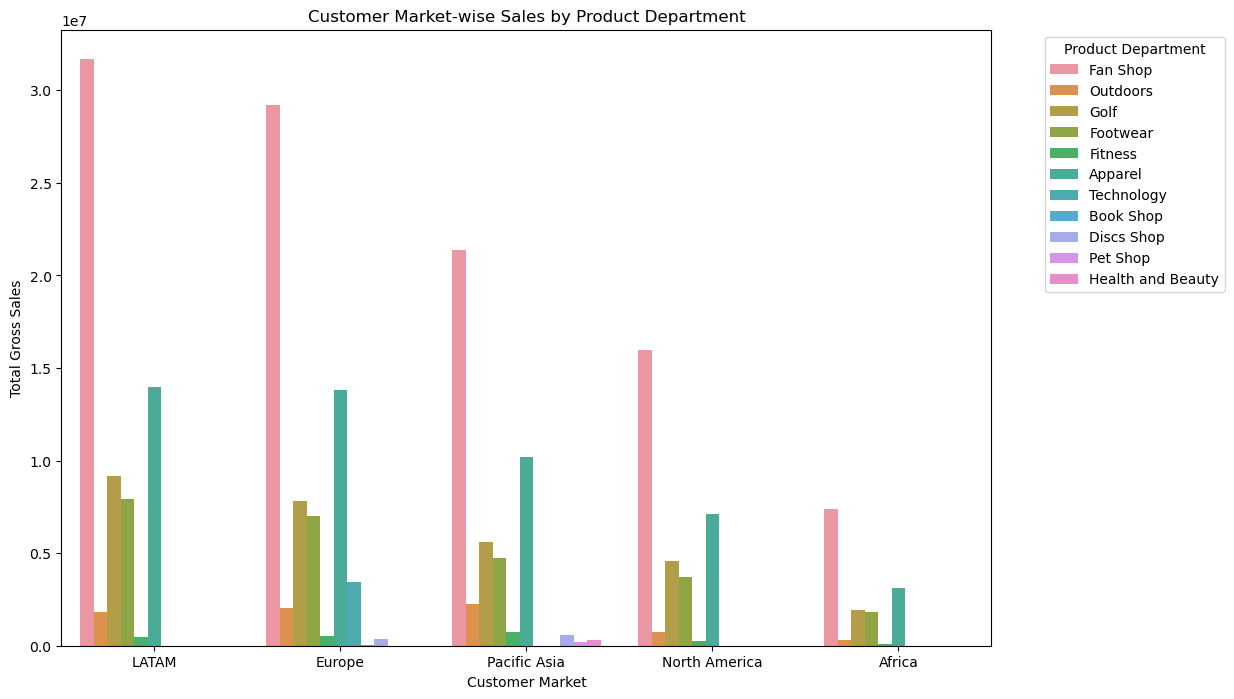

In [38]:
# Customer Market-wise Sales
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer Market', y='Gross Sales', hue='Product Department', data=df, estimator=sum, ci=None)
plt.title('Customer Market-wise Sales by Product Department')
plt.xlabel('Customer Market')
plt.ylabel('Total Gross Sales')
plt.legend(title='Product Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


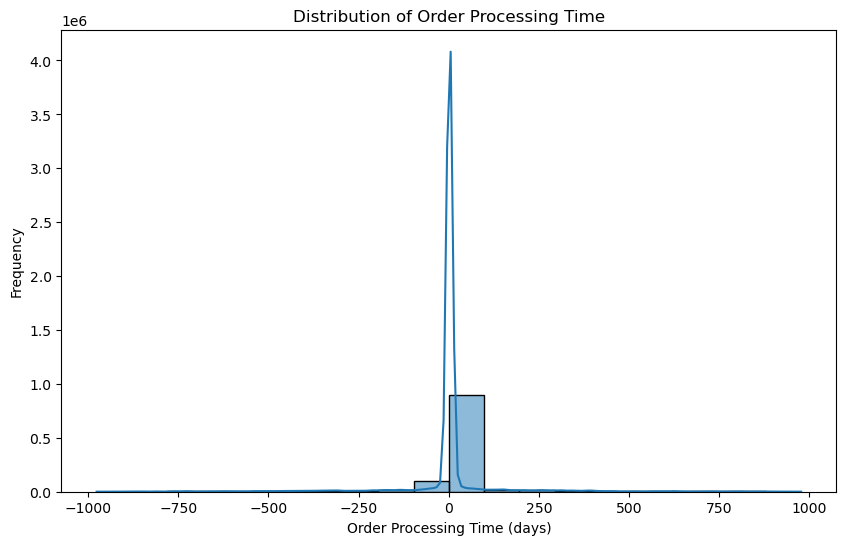

In [39]:
# Order Processing Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Processing Time'], bins=20, kde=True)
plt.title('Distribution of Order Processing Time')
plt.xlabel('Order Processing Time (days)')
plt.ylabel('Frequency')
plt.show()

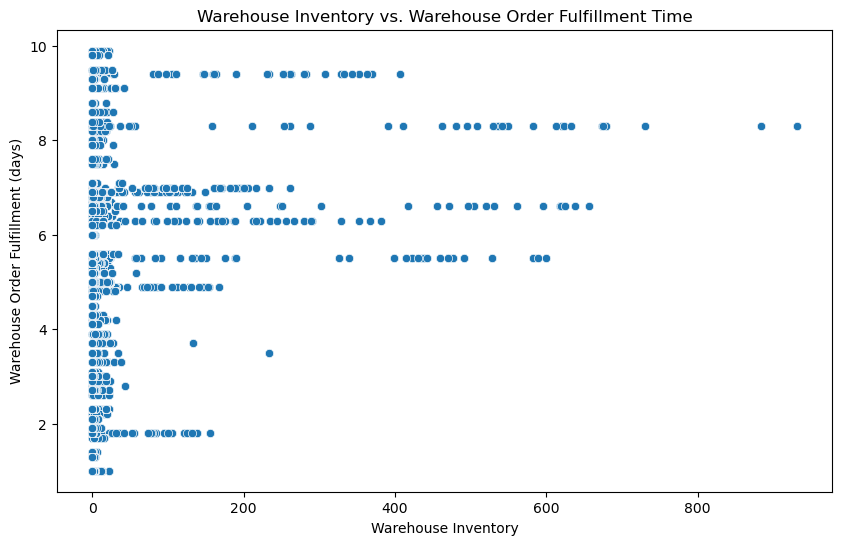

In [40]:
# Warehouse Inventory vs. Warehouse Order Fulfillment (days)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Warehouse Inventory', y='Warehouse Order Fulfillment (days)', data=df)
plt.title('Warehouse Inventory vs. Warehouse Order Fulfillment Time')
plt.xlabel('Warehouse Inventory')
plt.ylabel('Warehouse Order Fulfillment (days)')
plt.show()

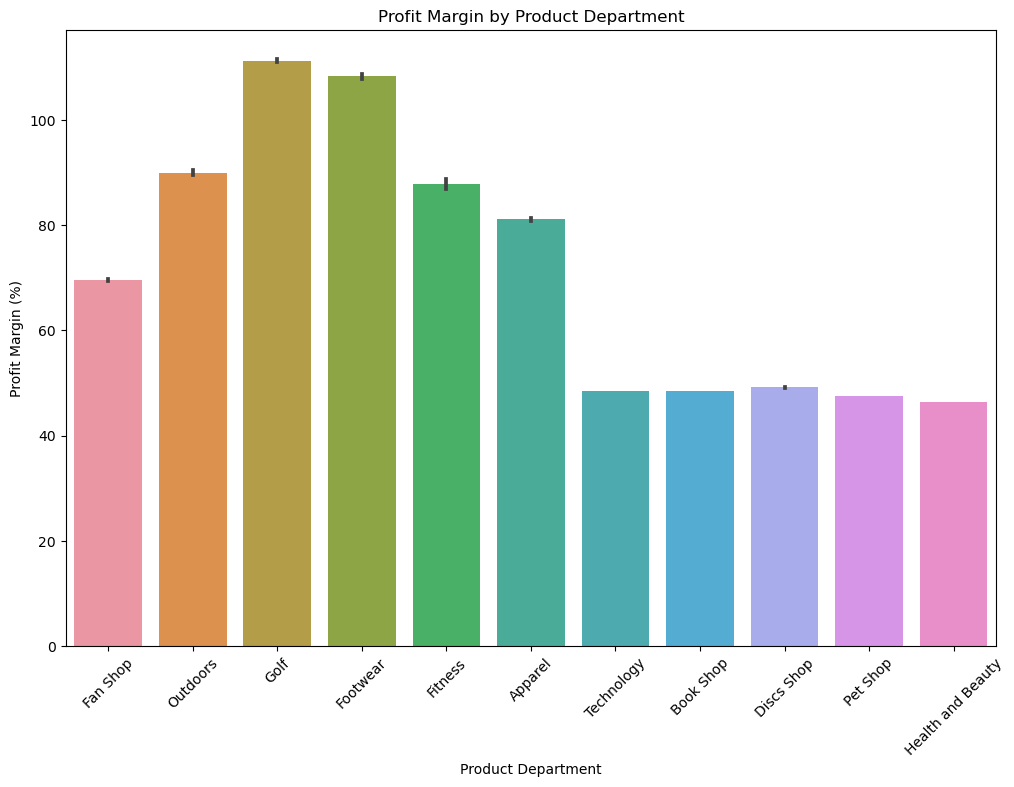

In [42]:
# Profit Margin by Product Department
df['Profit Margin'] = (df['Profit'] / df['Gross Sales']) * 100
plt.figure(figsize=(12, 8))
sns.barplot(x='Product Department', y='Profit Margin', data=df)
plt.title('Profit Margin by Product Department')
plt.xlabel('Product Department')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.show()

/var/folders/4z/1l1s8bz96kd3yz0ts7htzv1c0000gn/T/ipykernel_40331/1403297970.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Market', y='Order Quantity', data=df, estimator=sum, ci=None)


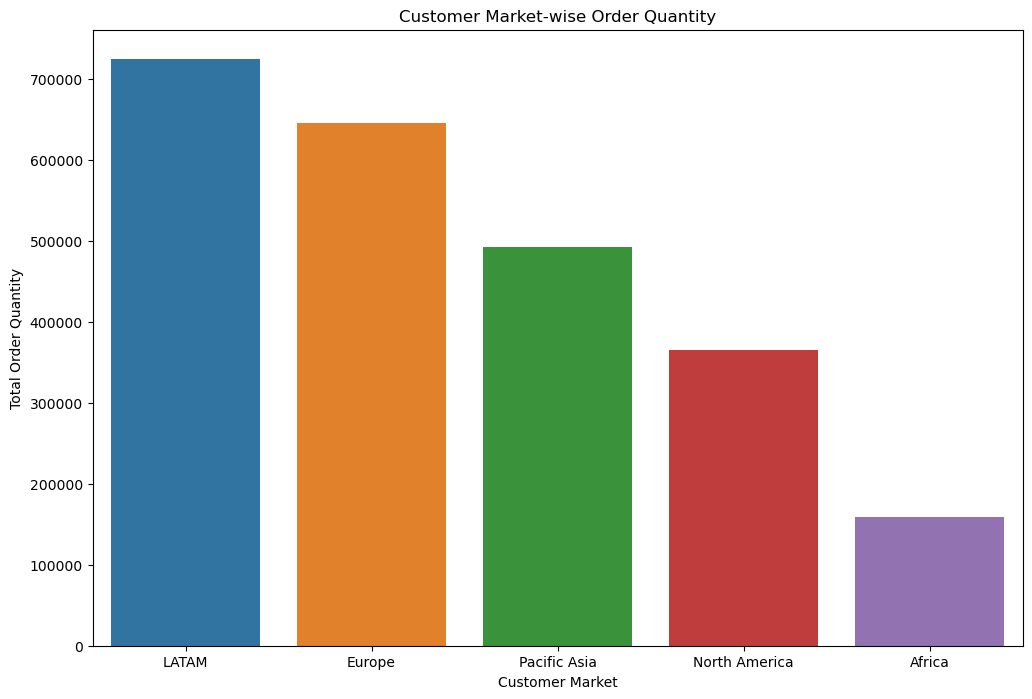

In [43]:
# Customer Market-wise Order Quantity
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer Market', y='Order Quantity', data=df, estimator=sum, ci=None)
plt.title('Customer Market-wise Order Quantity')
plt.xlabel('Customer Market')
plt.ylabel('Total Order Quantity')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


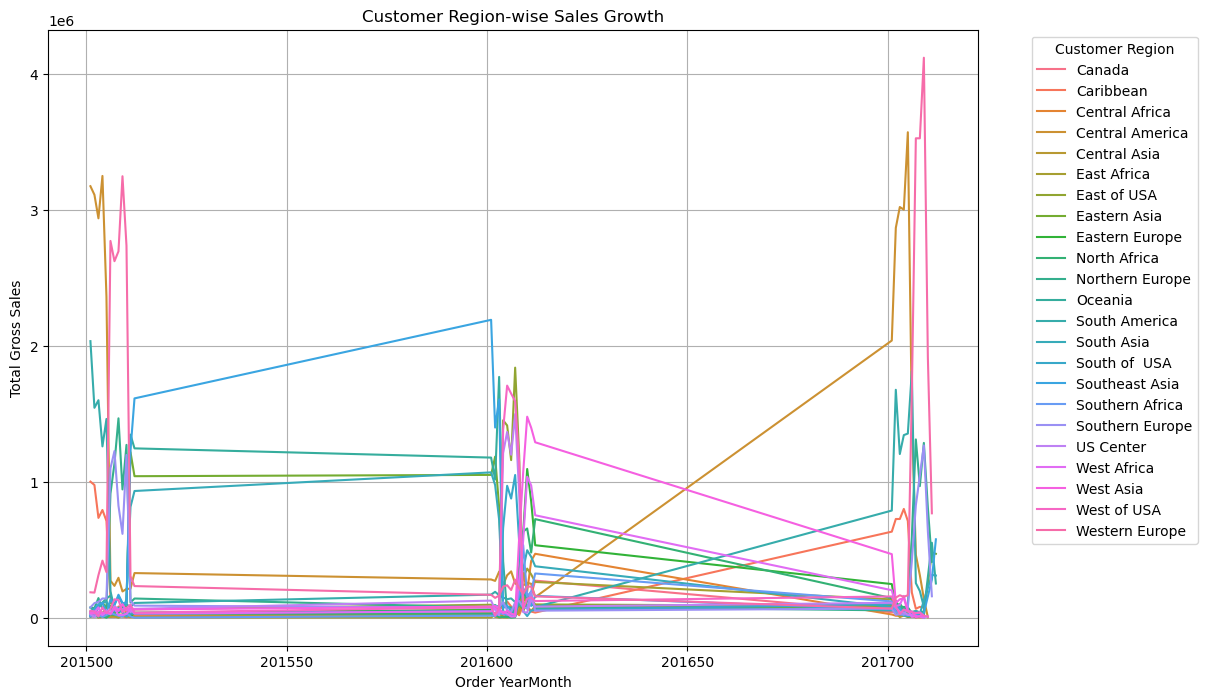

In [46]:
# Customer Region-wise Sales Growth
sales_growth = df.groupby(['Customer Region', 'Order YearMonth'])['Gross Sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Order YearMonth', y='Gross Sales', hue='Customer Region', data=sales_growth)
plt.title('Customer Region-wise Sales Growth')
plt.xlabel('Order YearMonth')
plt.ylabel('Total Gross Sales')
plt.grid(True)
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

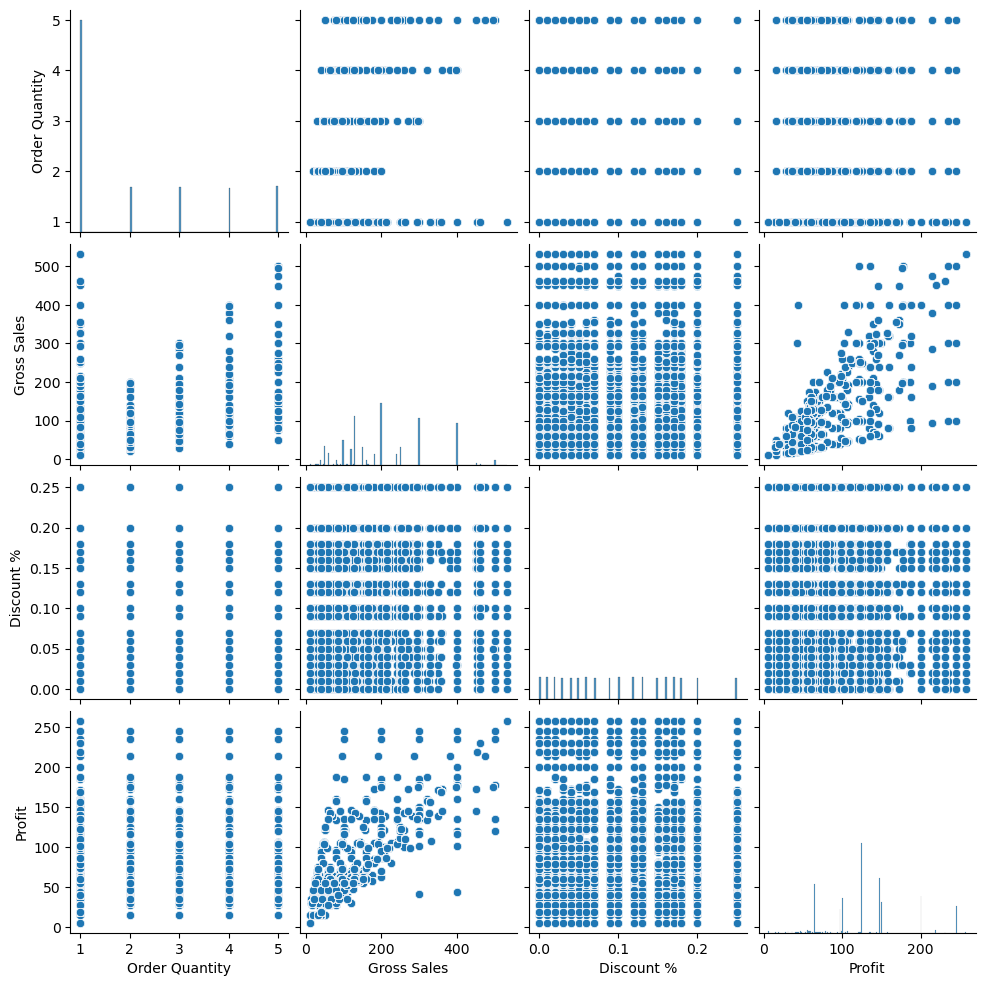

In [47]:
# Pairplot with Order Quantity and Gross Sales
sns.pairplot(df[['Order Quantity', 'Gross Sales', 'Discount %', 'Profit']])
plt.show()

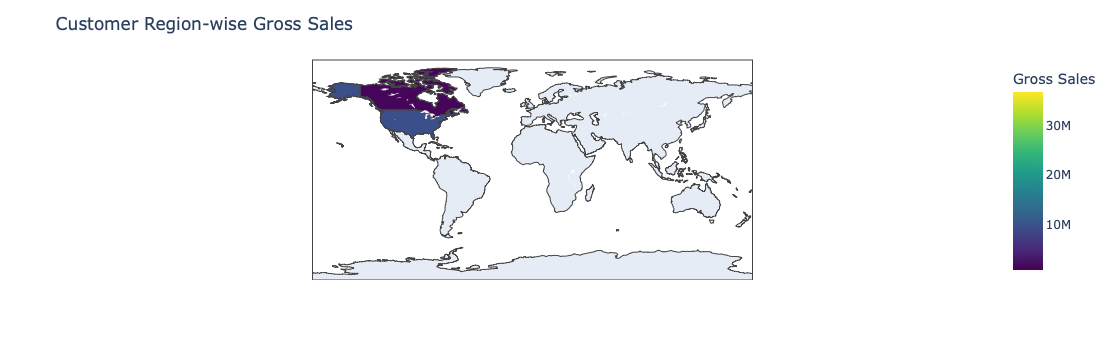

In [48]:
# Interactive Choropleth Map (using Plotly)
import plotly.express as px
region_sales = df.groupby('Customer Region')['Gross Sales'].sum().reset_index()
fig = px.choropleth(region_sales, locations='Customer Region', locationmode='country names', color='Gross Sales',
                    hover_name='Customer Region', color_continuous_scale='Viridis')
fig.update_layout(title_text='Customer Region-wise Gross Sales')
fig.show()

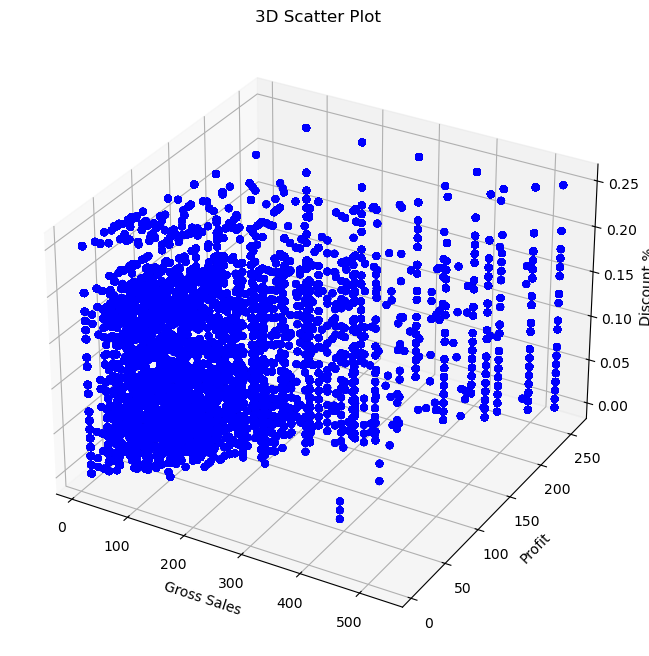

In [49]:
# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gross Sales'], df['Profit'], df['Discount %'], c='blue', marker='o')
ax.set_xlabel('Gross Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Discount %')
plt.title('3D Scatter Plot')
plt.show()

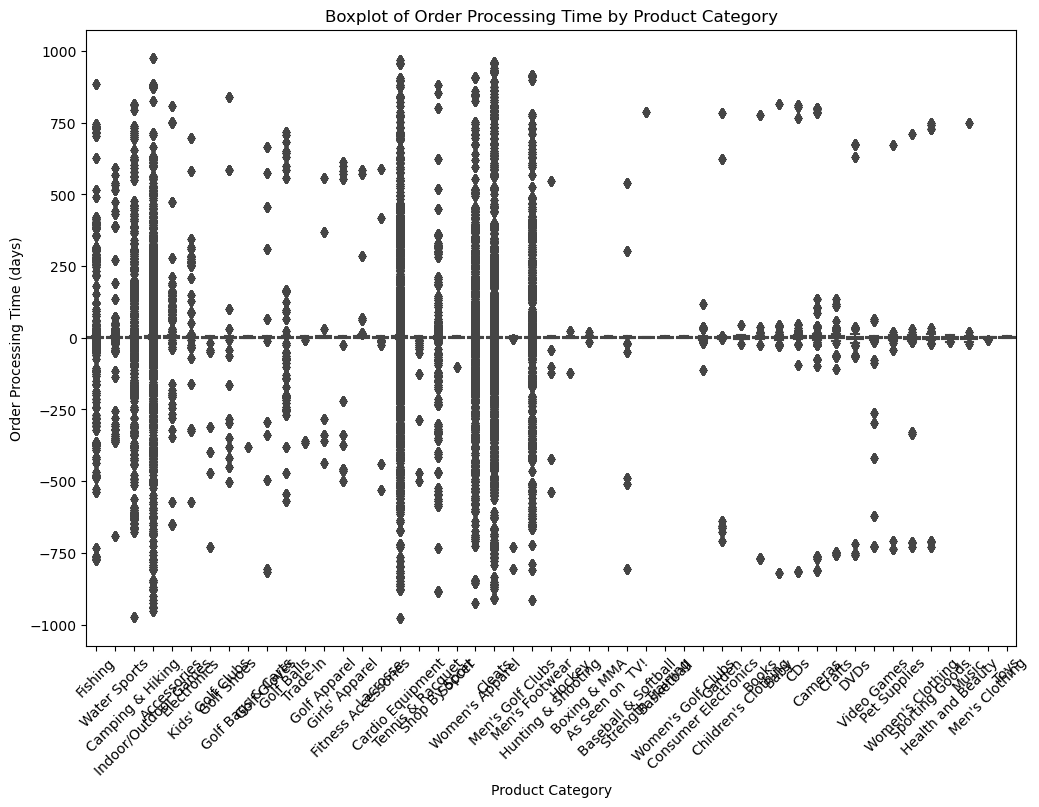

In [50]:
# Boxplot of Order Processing Time by Product Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Product Category', y='Order Processing Time', data=df)
plt.title('Boxplot of Order Processing Time by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Order Processing Time (days)')
plt.xticks(rotation=45)
plt.show()

Burlyn Andall-Blake

          Order ID    Order Item ID    Order YearMonth    Order Year   \
count  30871.000000     30871.000000       30871.000000  30871.000000   
mean   35818.833792     89380.257361      201601.137411   2015.948657   
std    20623.809444     51279.388574          79.438616      0.796323   
min       11.000000        29.000000      201501.000000   2015.000000   
25%    17905.000000     44721.500000      201509.000000   2015.000000   
50%    35886.000000     89624.000000      201606.000000   2016.000000   
75%    53507.000000    133710.500000      201702.000000   2017.000000   
max    77095.000000    180410.000000      201712.000000   2017.000000   

        Order Month     Order Day   Order Quantity   Customer ID   \
count   30871.000000  30871.000000    30871.000000   30871.000000   
mean        6.271679     15.735026        2.149817    6477.672152   
std         3.373914      8.484049        1.461393    3932.830830   
min         1.000000      1.000000        1.000000       2.000000 

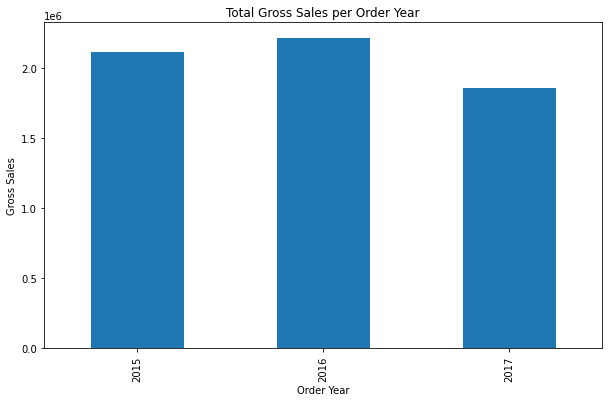

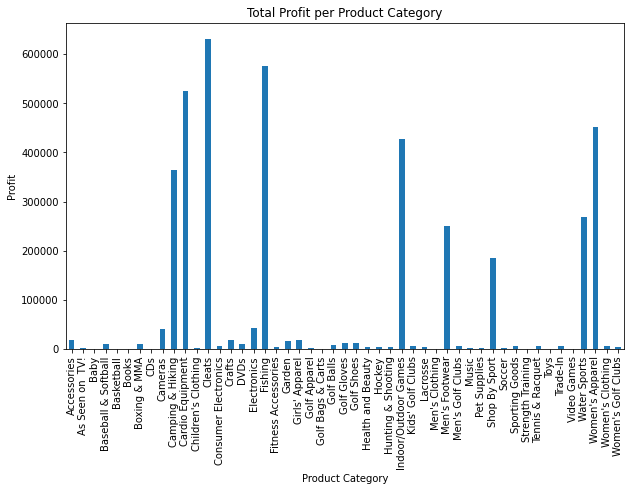

In [14]:
#df_orders analysis and visualization
print(df_orders.describe())
#print(list(df_orders.columns))

# Visualization
# the total Gross Sales per Order Year
sales_per_year = df_orders.groupby(' Order Year ')[' Gross Sales '].sum()

plt.figure(figsize=(10,6))
sales_per_year.plot(kind='bar')
plt.title('Total Gross Sales per Order Year')
plt.xlabel('Order Year')
plt.ylabel('Gross Sales')
plt.show()

# the total Profit per Product Category
profit_per_category = df_orders.groupby('Product Category')[' Profit '].sum()

plt.figure(figsize=(10,6))
profit_per_category.plot(kind='bar')
plt.title('Total Profit per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.show()


         Year Month    Warehouse Inventory   Inventory Cost Per Unit
count    4200.000000            4200.000000              4200.000000
mean   201607.705714              16.908095                 1.236450
std        81.411495              71.121721                 0.652183
min    201501.000000               0.000000                 0.102360
25%    201510.000000               0.000000                 0.672187
50%    201607.000000               0.000000                 1.262455
75%    201704.000000               4.000000                 1.800760
max    201712.000000             931.000000                 2.345030


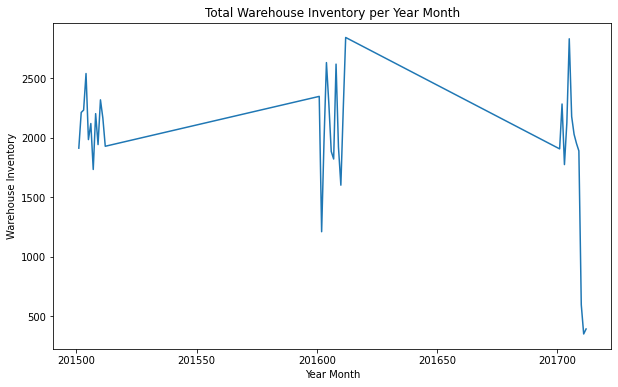

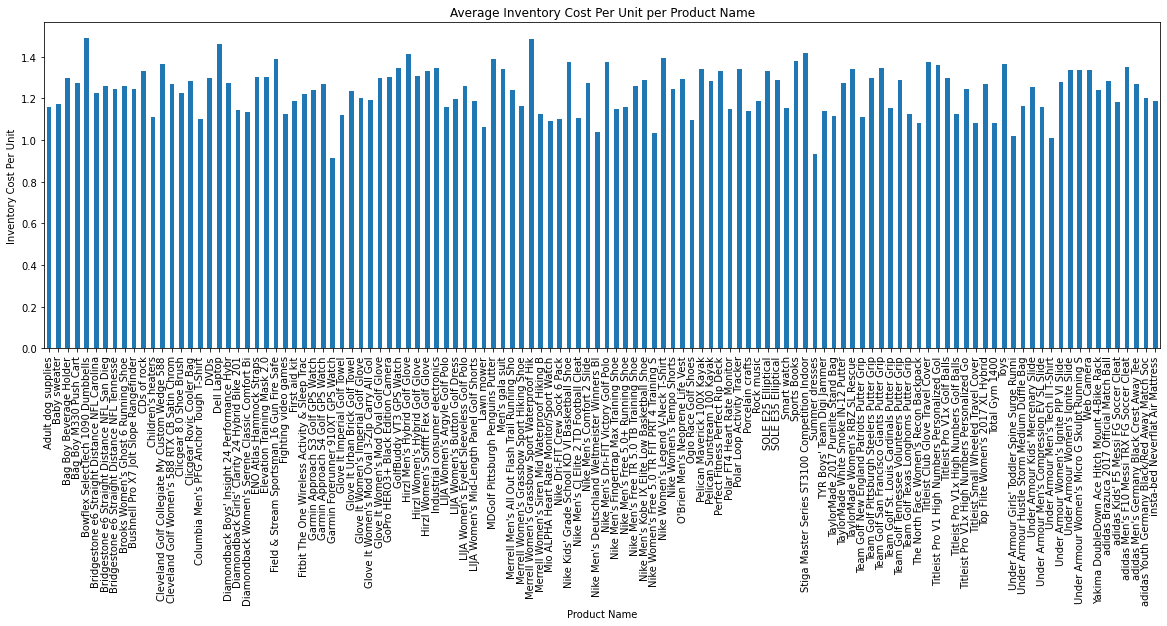

In [20]:
#df_inventory analysis and visualization

print(df_inventory.describe())
# Visualization
# total Warehouse Inventory per Year Month
inventory_per_month = df_inventory.groupby(' Year Month ')[' Warehouse Inventory '].sum()

plt.figure(figsize=(10,6))
inventory_per_month.plot(kind='line')
plt.title('Total Warehouse Inventory per Year Month')
plt.xlabel('Year Month')
plt.ylabel('Warehouse Inventory')
plt.show()

# average Inventory Cost Per Unit per Product Name
cost_per_product = df_inventory.groupby('Product Name')['Inventory Cost Per Unit'].mean()

plt.figure(figsize=(20,6))
cost_per_product.plot(kind='bar')
plt.title('Average Inventory Cost Per Unit per Product Name')
plt.xlabel('Product Name')
plt.ylabel('Inventory Cost Per Unit')
plt.show()

In [33]:
#merged df analysis and visualization
#displays all rows in the DataFrame where the value in the selected column is greater than the threshold.
@widgets.interact
def show_articles_more_than(column=list(df.select_dtypes('number').columns), 
                            x=(0, 100000, 10)):
    return df.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=(' Order ID ', ' Order Item ID ', ' Order YearMon…

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
# Load the dataset
df = df.copy()

In [24]:
# 1. Data Preprocessing
# Drop irrelevant columns if any
df.drop(['Order ID', 'Order Item ID', 'Customer ID', 'Order Datetime', 'Shipment Datetime'], axis=1, inplace=True)

# Handle missing values if any
df.fillna(0, inplace=True)

In [25]:
# Encode categorical variables
df = pd.get_dummies(df)

# Split the data into features and target variable
X = df.drop(['Profit'], axis=1)  # Assuming we want to predict Profit
y = df['Profit']

In [26]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Selection
model = LinearRegression()

# 3. Model Training
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# 4. Model Evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0120734857393116e-23
